In [1]:
from matplotlib import pyplot as plt
import random
from IPython import display
from functools import cmp_to_key
from math import sqrt, pow
from time import sleep

In [2]:
class Point:
    def __init__(self, x, y):
        # 좌표
        self.x = x
        self.y = y
        # 기준 좌표
        self.org_x = None
        self.org_y = None  
        

class Line:
    def __init__(self, point_1, point_2):
        # 속한 점들
        self.point_1 = point_1;
        self.point_2 = point_2;

In [3]:
# ccw
def ccw(point_1, point_2, point_3):
    # 포인트 어레이
    points = [ point_1, point_2, point_3, point_1 ]
    # ccw 값
    ccw_sum = 0
    # 계산
    for i in range(3):
        ccw_sum += points[i].x * points[i + 1].y
        ccw_sum -= points[i].y * points[i + 1].x

    return ccw_sum


# 교차 여부 판단 함수
def is_cross(line_1, line_2):
    ccw_1 = ccw(line_1.point_1, line_1.point_2, line_2.point_1);
    ccw_2 = ccw(line_1.point_1, line_1.point_2, line_2.point_2);
    ccw_3 = ccw(line_2.point_1, line_2.point_2, line_1.point_1);
    ccw_4 = ccw(line_2.point_1, line_2.point_2, line_1.point_2);
    
    result_1 = ccw_1 * ccw_2;
    result_2 = ccw_3 * ccw_4;

    if (result_1 < 0 and result_2 < 0): return True
    elif (result_1 > 0 and result_2 > 0): return False
    elif ((result_1 == 0 and result_2 < 0) or (result_1 < 0 and result_2 == 0)): return True
    elif ((result_1 == 0 and result_2 > 0) or (result_1 > 0 and result_2 == 0)): return False
    elif ((result_1 > 0 and result_2 < 0) or (result_1 < 0 and result_2 > 0)): return False
    else:
        if ((((line_1.point_1.x > line_2.point_1.x and line_1.point_2.x > line_2.point_1.x) and \
            (line_1.point_1.x > line_2.point_2.x and line_1.point_2.x > line_2.point_2.x)) or \
            ((line_1.point_1.y > line_2.point_1.y and line_1.point_2.y > line_2.point_1.y) and \
                (line_1.point_1.y > line_2.point_2.y and line_1.point_2.y > line_2.point_2.y))) or \

            (((line_2.point_1.x > line_1.point_1.x and line_2.point_2.x > line_1.point_1.x) and \
                (line_2.point_1.x > line_1.point_2.x and line_2.point_2.x > line_1.point_2.x)) or \
                ((line_2.point_1.y > line_1.point_1.y and line_2.point_2.y > line_1.point_1.y) and \
                    (line_2.point_1.y > line_1.point_2.y and line_2.point_2.y > line_1.point_2.y)))): return False;
        else: return True;
        
        
# 두 점 거리 계산
def cal_dist(pt_1, pt_2):
    # 각 좌표 차
    sub_x = pt_1.x - pt_2.x;
    sub_y = pt_1.y - pt_2.y;
    # 계산
    return sqrt(pow(sub_x, 2) + pow(sub_y, 2))


# x,y 오름차순 정렬
def sort_pillar(pt_1, pt_2):
    if pt_1.x < pt_2.x: return -1
    elif pt_1.x == pt_2.x and pt_1.y < pt_2.y: return -1
    else: return 1
    
    
# 시계방향 정렬
def sort_clockwise(pt_1, pt_2):
    # 기준점
    origin_pt = Point(pt_1.org_x, pt_1.org_y)
    # ccw 값
    CCW = ccw(origin_pt, pt_1, pt_2)
    # ccw 값이 음수면 시계 방향
    if CCW < 0: return -1;
    # ccw 값이 양수면 반시계 방향
    elif CCW > 0: return 1
    # 0 이면 직선, 가까운 점이 앞으로
    else:
        if cal_dist(origin_pt, pt_1) < cal_dist(origin_pt, pt_2): return -1
        else: return 1

        
# 포인트 검색 함수
def find_point(pt_vec, pt):
    # 제거된 점이 존재하면
    if pt_vec:
        for i in range(len(pt_vec)):
            if pt_vec[i].x == pt.x and pt_vec[i].y == pt.y: return True
        return False;
    # 존재하지 않으면
    else: return False

     
# 교도소가 껍질에 포함되는지 판별하는 함수
def is_include_prison(hull, pt_prison, hulls, idx_h, N, rate):
    # 한정된 정수 좌표평면의 어느점도 포함하지 않는 임의의 반직선
    line_org = Line(pt_prison, Point(200001, pt_prison.y + 1))
    
    global hull_colors
    
    plt.clf()
    plt.xlim(-(N+10)*rate, (N+10)*rate + 1)
    plt.ylim(-(N+10)*rate, (N+10)*rate + 1)
    for idx, hull_t in enumerate(hulls):
        plt.plot([pt.x for pt in hull_t], [pt.y for pt in hull_t], f"{hull_colors[idx]+'o-'}", markersize = 2)
    plt.plot([pt.x for pt in pillars], [pt.y for pt in pillars], 'ko-', markersize = 2)
    plt.plot([pt.x for pt in hull], [pt.y for pt in hull], 'ro-', markersize = 2)
    plt.plot([pt_prison.x, 30000], [pt_prison.y, pt_prison.y+1], 'ro-', markersize = 2)
    plt.plot(pt_prison.x, pt_prison.y, 'ro')
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    sleep(0.1)
    
    # 껍질과 반직선이 교차하는지 카운트
    cross_count = 0;
    # 껍질을 구성하는 선분 순회
    for i in range(len(hull)-1):
        # 껍질을 구성하는 선분
        hull_line = Line( hull[i], hull[i + 1] )
        
        plt.clf()
        plt.xlim(-(N+10)*rate, (N+10)*rate + 1)
        plt.ylim(-(N+10)*rate, (N+10)*rate + 1)
        for idx, hull_t in enumerate(hulls):
            plt.plot([pt.x for pt in hull_t], [pt.y for pt in hull_t], f"{hull_colors[idx]+'o-'}", markersize = 2)
        plt.plot([pt.x for pt in pillars], [pt.y for pt in pillars], 'ko-', markersize = 2)
#         plt.plot([pt.x for pt in hull], [pt.y for pt in hull], 'ro-', markersize = 2)
        plt.plot([pt_prison.x, 30000], [pt_prison.y, pt_prison.y+1], 'ro-', markersize = 2)
        plt.plot([hull[i].x, hull[i+1].x], [hull[i].y, hull[i+1].y], 'ro-', markersize = 2)
        plt.plot(pt_prison.x, pt_prison.y, 'ro')
        display.clear_output(wait=True)
        display.display(plt.gcf()) 
        sleep(0.1)
        
        # 교차하면 카운트 + 1
        if is_cross(line_org, hull_line):
            
            plt.clf()
            plt.xlim(-(N+10)*rate, (N+10)*rate + 1)
            plt.ylim(-(N+10)*rate, (N+10)*rate + 1)
            for idx, hull_t in enumerate(hulls):
                plt.plot([pt.x for pt in hull_t], [pt.y for pt in hull_t], f"{hull_colors[idx]+'o-'}", markersize = 2)
            plt.plot([pt.x for pt in pillars], [pt.y for pt in pillars], 'ko-', markersize = 2)
#             plt.plot([pt.x for pt in hull], [pt.y for pt in hull], 'ro-', markersize = 2)
            plt.plot([pt_prison.x, 30000], [pt_prison.y, pt_prison.y+1], 'ro-', markersize = 2)
            plt.plot([hull[i].x, hull[i+1].x], [hull[i].y, hull[i+1].y], 'bo-', markersize = 2)
            plt.plot(pt_prison.x, pt_prison.y, 'ro')
            display.clear_output(wait=True)
            display.display(plt.gcf()) 
            sleep(0.1)
            
            cross_count += 1
    
    # 카운트가 홀수면 포함됨
    if cross_count % 2 == 1:
        hull_colors[idx_h] = 'b'
        return True
    else:
        hull_colors[idx_h] = 'k'
        return False


# convex hull
def convex_hull(pillars, pt_prison, hulls, N, rate):
    # 스택
    stk = [pillars[0]]
    last_idx = 0

    # 기둥 순회
    while True:
        plt.clf()
        plt.xlim(-(N+10)*rate, (N+10)*rate + 1)
        plt.ylim(-(N+10)*rate, (N+10)*rate + 1)
        for hull in hulls:
            plt.plot([pt.x for pt in hull], [pt.y for pt in hull], 'go-', markersize = 2)
        plt.plot([pt.x for pt in pillars], [pt.y for pt in pillars], 'ko-', markersize = 2)
        plt.plot(pt_prison.x, pt_prison.y, 'bo', markersize = 5)
        plt.plot([pt.x for pt in stk], [pt.y for pt in stk], 'ro-', markersize = 2)
        display.clear_output(wait=True)
        display.display(plt.gcf()) 
        sleep(0.1)
        
        # 스택에 기둥이 두 개 미만이면 푸시
        if len(stk) < 2:
            # 마지막 기둥이면 끝
            if last_idx >= len(pillars)-1: break
            for i in range(last_idx+1, len(pillars)):
                # 스택에 푸시
                stk.append(pillars[i])
                # 마지막으로 푸시한 기둥 인덱스
                last_idx = i
                break
            continue
    
        ## 마지막 두 기둥이 감옥과 일직선상에 위치하는지 판별
        CCW_prison = ccw(stk[-1], stk[-2], pt_prison)
        # 일직선상에 위치하면
        if CCW_prison == 0:
            # 팝
            stk.pop()
            continue

        # 스택에 기둥이 세 개 미만이면 푸시
        if len(stk) < 3:
            # 마지막 기둥이면 끝
            if last_idx >= len(pillars)-1: break
            for i in range(last_idx+1, len(pillars)):
                # 스택에 푸시
                stk.append(pillars[i])
                # 마지막으로 푸시한 기둥 인덱스
                last_idx = i
                break
            continue

        # 마지막 세 기둥의 방향 판별
        CCW = ccw(stk[-3], stk[-2] , stk[-1])
        # 음수 ( 시계 방향 ) 거나 0 ( 일직선 ) 이면 다음 포인트 스택에 추가
        if CCW <= 0:
            # 마지막 기둥이면 끝
            if last_idx >= len(pillars)-1: break
            for i in range(last_idx+1, len(pillars)):
                # 스택에 푸시
                stk.append(pillars[i])
                # 마지막으로 푸시한 기둥 인덱스
                last_idx = i
                break
            continue

        # 양수 ( 반시계 방향 ) 이면 중간 포인트 삭제 후 다음 포인트 스택에 추가
        else :
            del stk[-2]
            continue
    
    return stk

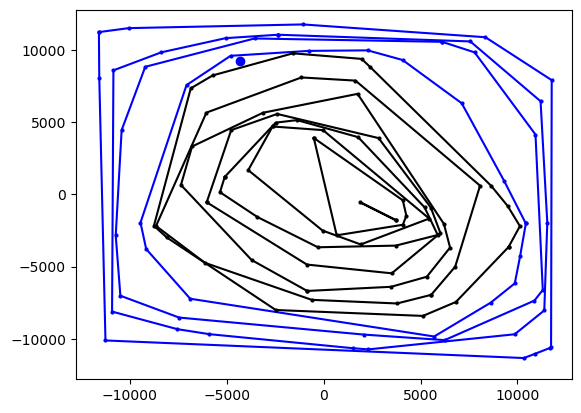

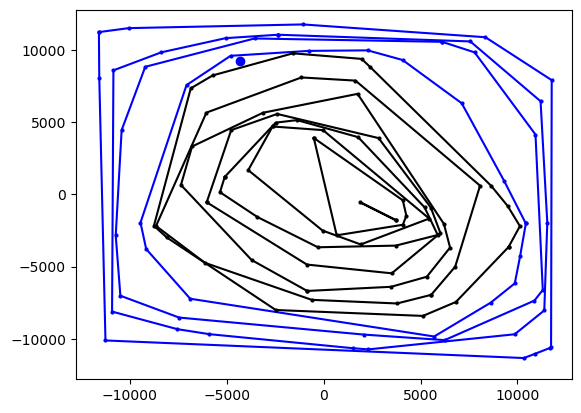

In [4]:
# 입력
# n, px, py = map(int, input().split())
# N, px, py = [8, -1, 0]
rate = 100
N = random.randint(100, 120)
px = random.randint(-N*rate//2, N*rate//2 + 1)
py = random.randint(-N*rate, N*rate + 1)
# 감옥 위치
pt_prison = Point(px, py)
# 기둥 위치 저장 리스트
# pillars = [list(map(int, input().split())) for _ in range(N)]
# pillars = [[2, 2], [2, -2], [-2, 2], [-2 ,-2], [0, 10], [8, 0], [-12, 1], [1, -5]]
pillar_x = random.sample(range(int(-N*rate), int(N*rate + 1)), N)
pillar_y = random.sample(range(int(-N*rate), int(N*rate + 1)), N)
pillars = [[x, y] for x, y in zip(pillar_x, pillar_y)]
for i in range(N):
    pillars[i] = Point(pillars[i][0], pillars[i][1])
# 기둥 위치 x,y 오름차순 정렬
pillars.sort(key=cmp_to_key(sort_pillar))
# 껍질들
hulls = []
while pillars:
    # 기준 좌표 설정
    for i in range(1, len(pillars)):
        pillars[i].org_x = pillars[0].x
        pillars[i].org_y = pillars[0].y
    # 기둥 위치 시계방향 정렬
    pillars.sort(key=cmp_to_key(sort_clockwise))
    # convex hull
    remove_points = convex_hull(pillars, pt_prison, hulls, N, rate)
    hulls.append(remove_points + [remove_points[0]])
    # 나온 껍질은 제거
    for pt in remove_points:
        for i in range(len(pillars)):
            if pt.x == pillars[i].x and pt.y == pillars[i].y:
                del pillars[i]
                break

plt.clf()
for hull in hulls:
    plt.plot([pt.x for pt in hull], [pt.y for pt in hull], 'go-', markersize = 2)
plt.plot(pt_prison.x, pt_prison.y, 'bo', markersize = 2)
display.clear_output(wait=True)
display.display(plt.gcf()) 
sleep(0.1)

hull_colors = ['g' for _ in range(len(hulls))]
# 교도소가 각 껍질에 포함되는지 판별
for idx_h, hull in enumerate(hulls):
    # 포함되면 카운트
    is_include_prison(hull, pt_prison, hulls, idx_h, N, rate)

plt.clf()
plt.xlim(-(N+10)*rate, (N+10)*rate + 1)
plt.ylim(-(N+10)*rate, (N+10)*rate + 1)
for idx, hull_t in enumerate(hulls):
    plt.plot([pt.x for pt in hull_t], [pt.y for pt in hull_t], f"{hull_colors[idx]+'o-'}", markersize = 2)
plt.plot([pt.x for pt in pillars], [pt.y for pt in pillars], 'ko-', markersize = 2)
plt.plot(pt_prison.x, pt_prison.y, 'bo')
display.clear_output(wait=True)
display.display(plt.gcf()) 
sleep(0.1)